In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
def GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true):
    xold = x0
    k=0
    conditions = True
    
    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    errA_values = []  # Store ||grad_f(x_k)||_2 values
    errR_values = []  # Store ||xk-xtrue||_2 values
    
    while conditions:
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        errA_values.append(np.linalg.norm(grad_f(x), 2))
        errR_values.append(np.linalg.norm(x - x_true, 2))
        
        condition1 = np.linalg.norm(grad_f(x)) > tolf*np.linalg.norm(grad_f(x0))
        condition2 =  np.linalg.norm(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 & condition2 & condition3
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, errA_values, errR_values

def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            break
    return alpha
    
def GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true):
    xold = x0
    k = 0
    conditions = True

    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    errA_values = []  # Store ||grad_f(x_k)||_2 values
    errR_values = []  # Store ||xk-xtrue||_2 values
    
    while conditions:
        alpha = backtracking(f, grad_f, xold)
        x = xold - alpha * grad_f(xold)
        
        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        errA_values.append(np.linalg.norm(grad_f(x), 2))
        errR_values.append(np.linalg.norm(x - x_true, 2))
        
        condition1 = np.linalg.norm(grad_f(x), 2) > tolf * np.linalg.norm(grad_f(x0), 2)
        condition2 = np.linalg.norm(x-xold, 2) > tolx
        condition3 = k < kmax
        conditions = condition1 and condition2 and condition3
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, errA_values, errR_values

In [96]:
def plt_contour(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    xv = np.linspace(-10, 10, 100).T
    yv = np.linspace(-10, 10, 100).T

    xx,yy = np.meshgrid(xv, yv)
    
    zz = f([xx, yy])

    xk_vals = np.array(xk_vals)
    
    plt.plot(xk_vals[:,0], xk_vals[:,1], '--go')

    plt.contour(xx, yy, zz)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.grid()

Alpha: 0.1, Iteration: 30, Solution: [2.99628618 0.99876206], Error: 0.0012379400392853901
Alpha: 0.01, Iteration: 101, Solution: [2.61009851 0.87003284], Error: 0.12996716477685807
Alpha: 0.001, Iteration: 101, Solution: [0.54921099 0.18307033], Error: 0.816929671079051


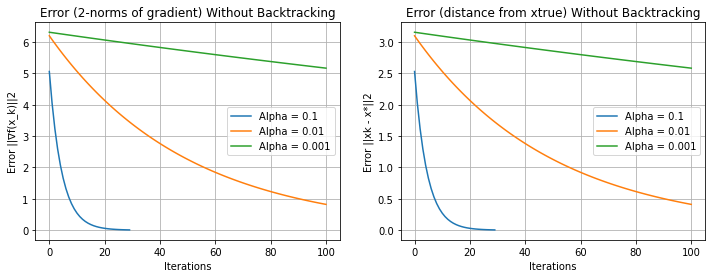


Iteration: 46, Solution: [2.99355101 0.99785034], Error: 0.0021496632850157016


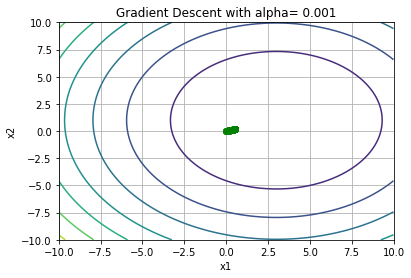

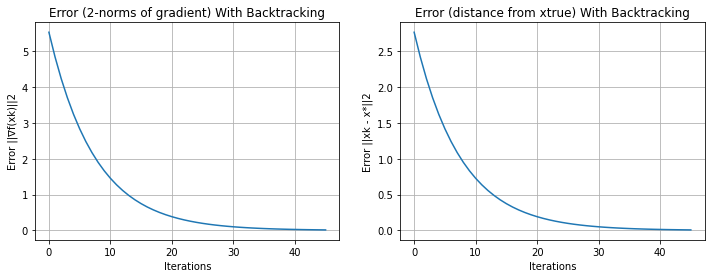

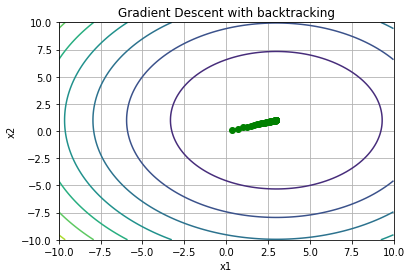

In [97]:
#FUNCTION 1
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-3)**2 + (x2-1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1-3), 2*(x2-1)])

x0 = np.array([0, 0])
kmax = 100 #try 100 and 1000
tolf = tolx = 1e-3
x_true = np.array([3, 1])

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with alpha= " + str(alpha))

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with backtracking")

Alpha: 0.1, Iteration: 101, Solution: [2. 2.], Error: 0.4472135954999579
Alpha: 0.01, Iteration: 101, Solution: [1.         1.74006567], Error: 0.11624616611358829
Alpha: 0.001, Iteration: 101, Solution: [0.87003284 0.36614066], Error: 0.7329921983046531


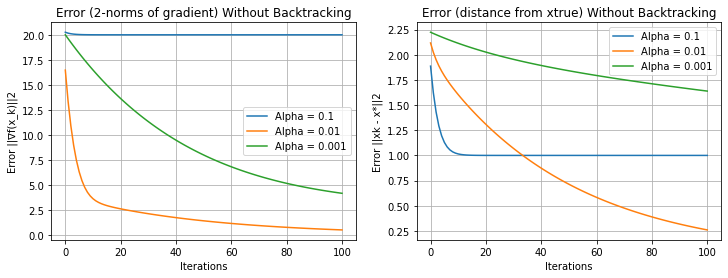


Iteration: 80, Solution: [1.         1.99990644], Error: 4.18422348494792e-05


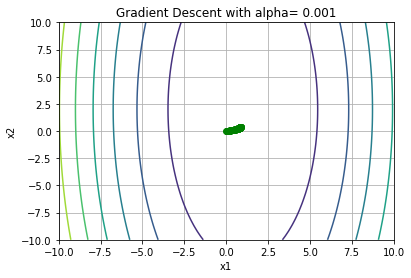

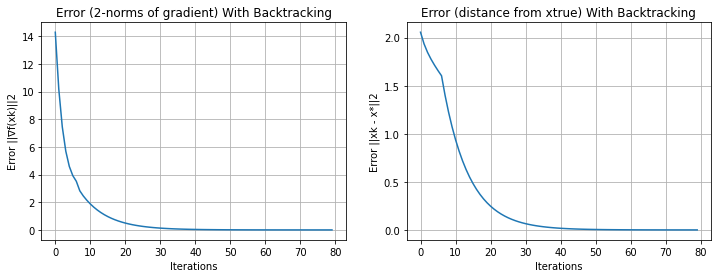

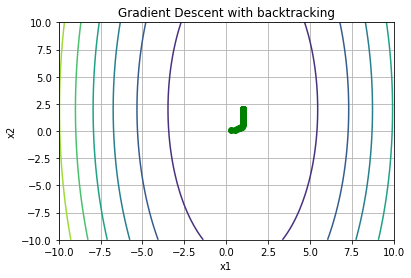

In [98]:
#FUNCTION 2 
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (10*(x1 - 1)**2 + (x2 - 2)**2)
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1 - 1), 2*(x2 - 2)])

x0 = np.array([0, 0])
kmax = 100 #try 100 and 1000
tolf = tolx = 1e-5
x_true = np.array([1, 2])

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]: # with alpha = 0.1 GD doesn't converge and stops in (2, 2) after max (1000) iteration. 
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with alpha= " + str(alpha))

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

plt_contour(x_sol_values, k, f_values, grad_values, errA_values, f, "Gradient Descent with backtracking")

n = 5
Alpha: 0.1, Iteration: 101, Solution: [0.9919947  1.02701094 1.01220753 0.9914064  0.97267007], Error: 0.01878017197073288
Alpha: 0.01, Iteration: 101, Solution: [1.0818782  1.04385715 0.96810777 0.91430429 0.87599673], Error: 0.08045516866642592
Alpha: 0.001, Iteration: 101, Solution: [0.80243423 0.57900279 0.49635697 0.44917477 0.41937529], Error: 0.4712665239096292


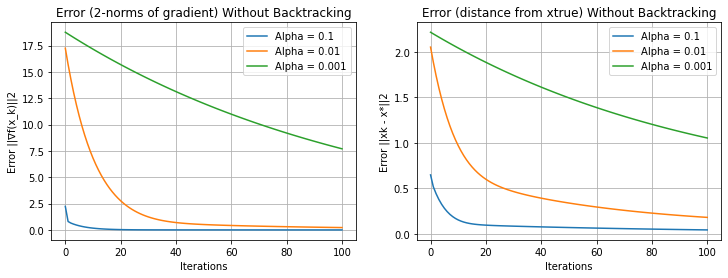


Iteration: 101, Solution: [0.99581423 1.01289291 1.00977362 0.99646586 0.98262623], Error: 0.010895958578089015


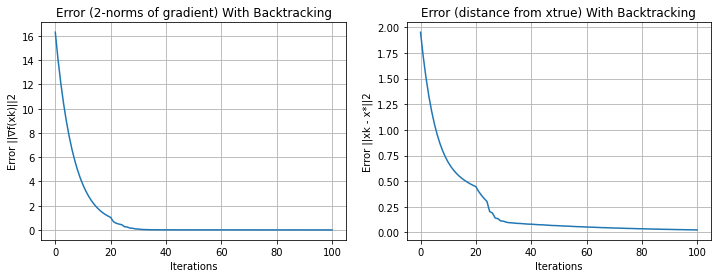

In [99]:
# FUNCTION 3

print("n = 5")
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true

def f(x):
    return 1/2*(np.linalg.norm(A @ x - b, 2)**2)

def grad_f(x): #AT(Ax−b)
    residual = (A @ x) - b
    gradient = A.T @ residual
    return gradient

x0 = np.zeros(n)
kmax = 100 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n = 10
Alpha: 0.1, Iteration: 101, Solution: [71.42098608 47.48660549 38.53884523 33.43705714 30.09054876 27.71245487
 25.93405734 24.55641102 23.46141353 22.57394312], Error: 36.452468303130736
Alpha: 0.01, Iteration: 101, Solution: [0.95690303 1.07607264 1.0725215  1.04866849 1.02123248 0.99490879
 0.97103644 0.94986108 0.93125214 0.91495921], Error: 0.05573161264352245
Alpha: 0.001, Iteration: 101, Solution: [1.2375304  1.00682957 0.88700895 0.80782231 0.75073516 0.70744069
 0.67349161 0.64623007 0.62394543 0.60547588], Error: 0.27977092328388914


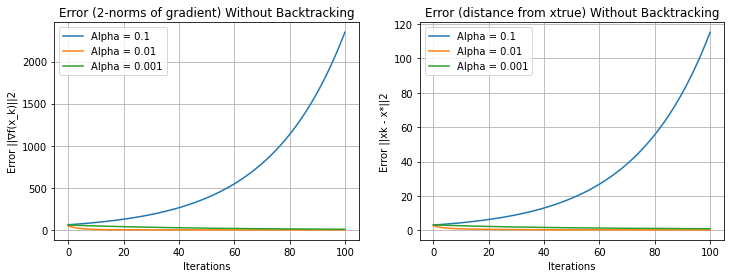


Iteration: 101, Solution: [1.00289168 0.98280901 1.00314768 1.01213224 1.0131498  1.00968715
 1.00393304 0.99716014 0.99009363 0.98313968], Error: 0.010647482918473549


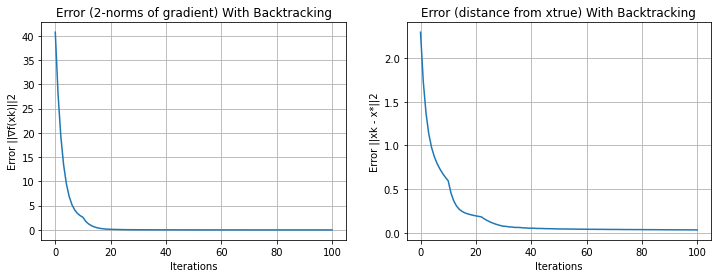

In [100]:
# FUNCTION 3

print("n = 10")
n = 10
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true

def f(x):
    return 1/2*(np.linalg.norm(A @ x - b, 2)**2)

def grad_f(x): #AT(Ax−b)
    residual = (A @ x) - b
    gradient = A.T @ residual
    return gradient

x0 = np.zeros(n)
kmax = 100 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)
plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n=5
l = 0.3553812076774253
Alpha: 0.1, Iteration: 88, Solution: [1.0179361  1.00066584 0.9421773  0.89812869 0.86581922], Error: 0.08005980111831032
Alpha: 0.01, Iteration: 534, Solution: [1.01759401 1.00200848 0.94239848 0.89764053 0.86487112], Error: 0.08045967016718304
Alpha: 0.001, Iteration: 1001, Solution: [1.07437257 0.99486171 0.91381118 0.85872926 0.82033246], Error: 0.11421386997602014


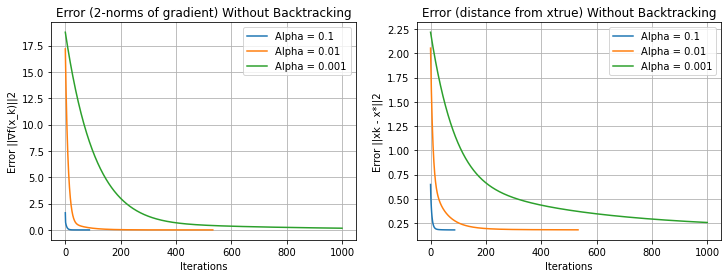


Iteration: 81, Solution: [1.01794256 1.00064145 0.94217317 0.89813737 0.86583621], Error: 0.08005274234889606


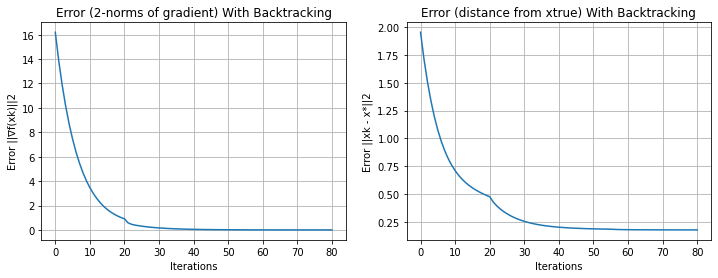

In [101]:
#FUNCTION 4
import random

print("n=5")
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true
l = random.random() #fixed values between [0, 1] 
print(f"l = {l}")

def f(x):
    return 0.5*np.linalg.norm(A @ x - b, 2)**2 + l/2*np.linalg.norm(x, 2)**2

def grad_f(x): #AT(Ax-b)
    residual = (A @ x) - b
    gradient = A.T @ residual + l * x
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

n=10
l = 0.7660248596447847
Alpha: 0.1, Iteration: 1001, Solution: [1.12657323e+47 7.43992306e+46 6.00495599e+46 5.18728537e+46
 4.65177709e+46 4.27193920e+46 3.98841321e+46 3.76916003e+46
 3.59516665e+46 3.45434937e+46], Error: 5.831782395988521e+46
Alpha: 0.01, Iteration: 389, Solution: [1.00788382 1.03876416 1.01558667 0.98491974 0.95507383 0.92812078
 0.9043972  0.88371338 0.86573435 0.85010946], Error: 0.08507471444184998
Alpha: 0.001, Iteration: 1001, Solution: [1.00142429 1.05687946 1.02733854 0.9901337  0.95513627 0.92427237
 0.89757114 0.87459203 0.8548184  0.83777094], Error: 0.0924360658254343


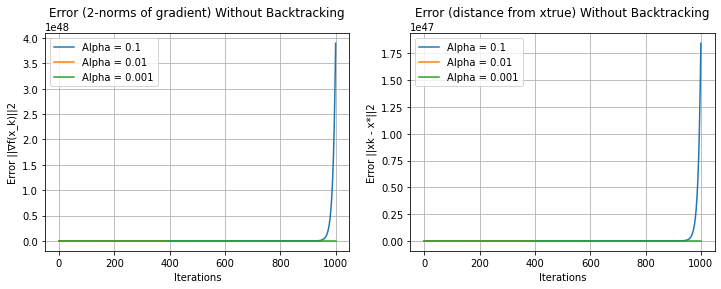


Iteration: 43, Solution: [1.00801438 1.03854426 1.01542832 0.98483817 0.95505645 0.92815382
 0.90446953 0.88381655 0.86586197 0.85025671], Error: 0.08499431117734634


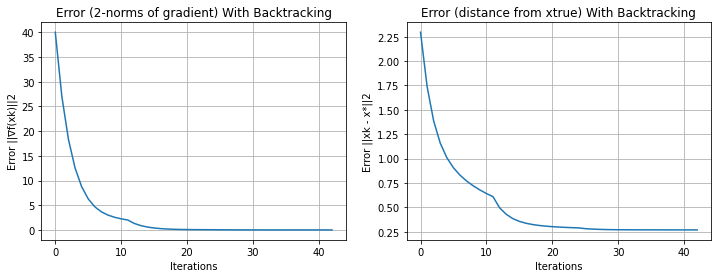

In [102]:
#FUNCTION 4
import random

print("n=10")
n = 10
v = np.linspace(0, 1, n)
A = np.vander(v, increasing=True)
x_true = np.ones((n,))
b = A @ x_true
l = random.random() #fixed values between [0, 1] 
print(f"l = {l}")

def f(x):
    return 0.5*np.linalg.norm(A @ x - b, 2)**2 + l/2*np.linalg.norm(x, 2)**2

def grad_f(x): #AT(Ax-b)
    residual = (A @ x) - b
    gradient = A.T @ residual + l * x
    return gradient

x0 = np.zeros(n)
kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

plt.figure(figsize=(12, 4))

#Without backtracking
for alpha in [0.1, 0.01, 0.001]:
    x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx, x_true)
    error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
    print(f"Alpha: {alpha}, Iteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")
    
    plt.subplot(1, 2, 1)
    plt.plot(range(k), errA_values, label=f"Alpha = {alpha}")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(x_k)||2")
    plt.legend()
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.grid(True)
     
    plt.subplot(1, 2, 2)   
    plt.plot(range(k), errR_values, label=f"Alpha = {alpha}") # plot the error ||xk − x_true||2 varying k when the true x_true is available
    plt.xlabel("Iterations")
    plt.ylabel("Error ||xk - x*||2")
    plt.title("Error (distance from xtrue) Without Backtracking")
    plt.legend()
    plt.grid(True)

plt.show()

#With backtracking
x_sol_values, k, f_values, grad_values, errA_values, errR_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx, x_true)
error = np.linalg.norm(np.array(x_true) - np.array(x_sol_values[-1])) / np.linalg.norm(np.array(x_true))
print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}, Error: {error}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(k), errA_values)
plt.xlabel("Iterations")
plt.ylabel("Error ||∇f(xk)||2")
plt.title("Error (2-norms of gradient) With Backtracking")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(k), errR_values) # plot the error ||xk − x_true||2 varying k when the true x_true is available
plt.xlabel("Iterations")
plt.ylabel("Error ||xk - x*||2")
plt.title("Error (distance from xtrue) With Backtracking")
plt.grid(True)

plt.show()

In [103]:
def my_plot_2D(xk_vals, k, f_vals, grad_valks, err_vals, f, title):
    x_vals = np.linspace(-3, 3, 100)
    y_vals = []
    for x in x_vals:
        y_vals.append(f(x))
    plt.plot(x_vals, y_vals)
    plt.scatter(xk_vals, f_vals, c='green')
    plt.title(title)

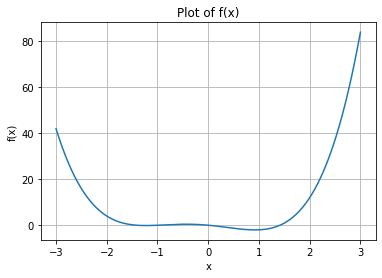

Alpha: 0.1, x0: -1, Iteration: 11, Solution: -1.2322368229753748
Alpha: 0.01, x0: -1, Iteration: 113, Solution: -1.2321078834970505
Alpha: 0.001, x0: -1, Iteration: 811, Solution: -1.2307850520802697


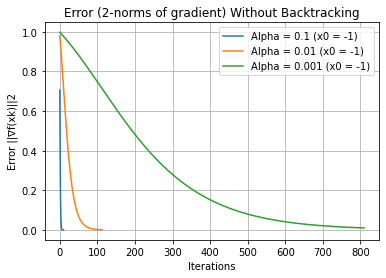

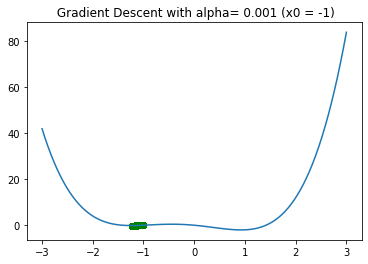


Iteration: 54, Solution: -1.2321590180202115


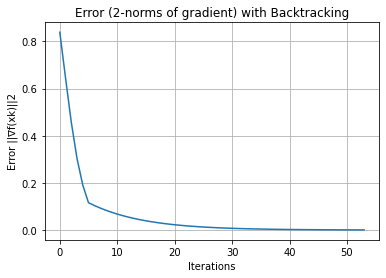

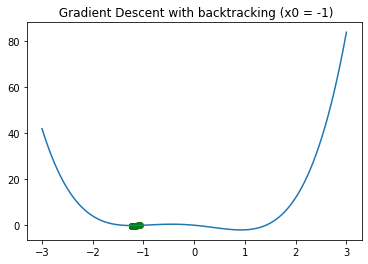

Alpha: 0.1, x0: 0, Iteration: 9, Solution: 0.9222263966908124
Alpha: 0.01, x0: 0, Iteration: 95, Solution: 0.9221561972760987
Alpha: 0.001, x0: 0, Iteration: 774, Solution: 0.9213887683969288


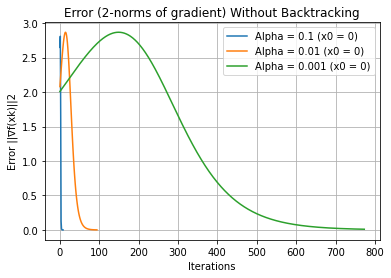

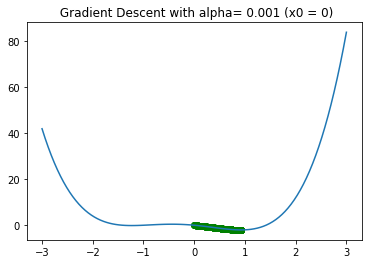


Iteration: 47, Solution: 0.9221833168070763


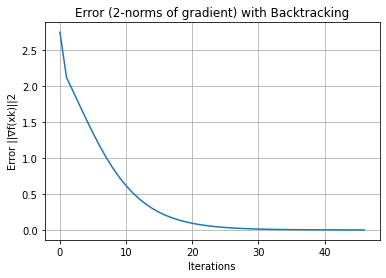

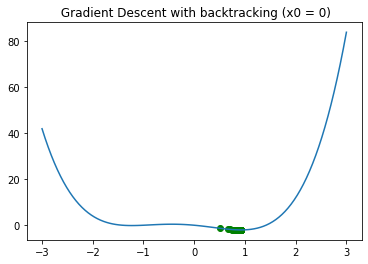

In [104]:
# FUNCTION 5

def GD(f, grad_f, x0, alpha, kmax, tolf, tolx):
    xold = x0
    k=0
    conditions = True

    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    err_values = []  # Store ||grad_f(x_k)||_2 values
    
    while conditions:
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        err_values.append(np.abs(grad_f(x)))
        
        condition1 = np.abs(grad_f(x)) > tolf*np.abs(grad_f(x0))
        condition2 =  np.abs(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 & condition2 & condition3
        
        k +=1
        xold = x
    return x_values, k, f_values, grad_values, err_values
    
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.abs(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-5:
            print("alpha too small")
            break
    return alpha

def GD_backtracking(f, grad_f, x0, kmax, tolf, tolx):
    xold = x0
    k = 0
    conditions = True
    
    x_values = []  # Store x_k values
    f_values = []  # Store f(x_k) values
    grad_values = []  # Store grad_f(x_k) values
    err_values = []  # Store ||grad_f(x_k)||_2 values
    
    while conditions:
        alpha = backtracking(f, grad_f, xold)
        x = xold - alpha * grad_f(xold)

        x_values.append(x)
        f_values.append(f(x))
        grad_values.append(grad_f(x))
        err_values.append(np.abs(grad_f(x)))
        
        condition1 = np.abs(grad_f(x)) > tolf*np.abs(grad_f(x0))
        condition2 =  np.abs(x-xold) > tolx
        condition3 = k < kmax
        conditions = condition1 and condition2 and condition3
        
        k += 1
        xold = x
    return x_values, k, f_values, grad_values, err_values
    
def f(x):
    return x**4+x**3-2*x**2-2*x # Non convex function

x = np.linspace(-3, 3, 200)
y = f(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()

def grad_f(x):
    return 4*(x**3)+3*(x**2)-4*x-2

kmax = 1000 # try 100 and 1000
tolf = tolx = 1e-5

for x0 in [-1, 0]:
    #Without backtracking
    for alpha in [0.1, 0.01, 0.001]:
        x_sol_values, k, f_values, grad_values, err_values = GD(f, grad_f, x0, alpha, kmax, tolf, tolx)
        print(f"Alpha: {alpha}, x0: {x0}, Iteration: {k}, Solution: {x_sol_values[-1]}")
        plt.plot(range(k), err_values, label=f"Alpha = {alpha} (x0 = {x0})")
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(xk)||2")
    plt.title("Error (2-norms of gradient) Without Backtracking")
    plt.legend()
    plt.grid(True)
    
    plt.show()

    my_plot_2D(x_sol_values, k, f_values, grad_values, err_values, f, " Gradient Descent with alpha= " + str(alpha) + " (x0 = " + str(x0) + ")")
    plt.show()
    
    #With backtracking
    x_sol_values, k, f_values, grad_values, err_values = GD_backtracking(f, grad_f, x0, kmax, tolf, tolx)
    print(f"\nIteration: {k}, Solution: {x_sol_values[-1]}")
    
    plt.plot(range(k), err_values)
    plt.xlabel("Iterations")
    plt.ylabel("Error ||∇f(xk)||2")
    plt.title("Error (2-norms of gradient) with Backtracking")
    plt.grid(True)

    plt.show()

    my_plot_2D(x_sol_values, k, f_values, grad_values, err_values, f, " Gradient Descent with backtracking (x0 = " + str(x0) + ")")
    plt.show()